In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from plotingfun import *
from helper_functions import *
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
import tensorflow as tf

In [2]:
file="F:/Combined_features.csv"

In [3]:
data=pd.read_csv(file)

In [4]:
data

,Unnamed: 0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,101,102,103,104,105,106,107,108,109,label
0,tr03-0052_0,4.949566,1.716723,3.063322,-3.168562,0.653102,2.582151,-2.453936,-0.671440,-0.206653,...,0.031316,0.315907,10.087598,122.122415,12.106193,0.000914,0.009215,0.111562,0.029171,0.0
1,tr03-0052_1,3.294568,1.773122,3.437111,-2.466453,1.073087,3.222085,-1.817267,-0.428240,-0.309468,...,0.010967,0.326214,29.746350,562.133171,18.897551,0.000273,0.008114,0.153325,0.024872,0.0
2,tr03-0052_2,2.313243,1.505059,3.529720,-2.305134,1.314736,2.953718,-0.834637,-1.001961,0.009905,...,0.021404,0.547738,25.590473,169.153486,6.610018,0.001585,0.040556,0.268076,0.074043,0.0
3,tr03-0052_3,3.621584,1.716069,3.572339,-2.606968,1.666539,3.156717,-0.977676,-1.423478,0.269535,...,0.008571,0.357944,41.763714,728.440486,17.441947,0.000246,0.010292,0.179514,0.028753,0.0
4,tr03-0052_4,3.402294,1.539172,2.453311,-1.864934,1.132373,3.679740,-1.844185,-1.506309,0.398084,...,0.006091,0.230898,37.906434,1025.293066,27.047996,0.000244,0.009250,0.250185,0.040060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858611,tr14-0276_855,5.251837,-1.046252,3.328253,-0.618304,1.180417,2.490258,-1.545480,-0.013777,1.727039,...,0.419216,0.815350,1.944940,8.824024,4.536913,0.005489,0.010676,0.048436,0.013094,2.0
858612,tr14-0276_856,5.114956,-1.021375,3.172771,-0.589785,1.136317,2.537939,-1.551545,-0.062598,1.626741,...,0.083542,0.592937,7.097489,34.087260,4.802721,0.006392,0.045369,0.217895,0.076516,2.0
858613,tr14-0276_857,2.292055,-0.736344,2.938707,-0.216755,1.364830,2.768472,-1.830078,0.042532,1.558017,...,0.754995,0.926650,1.227360,4.103628,3.343460,0.017303,0.021238,0.071007,0.022919,4.0
858614,tr14-0276_858,3.540101,-0.793999,3.146213,-0.439626,1.697360,2.509241,-1.477822,0.075712,1.669965,...,0.772761,0.882547,1.142070,5.219276,4.570014,0.010321,0.011787,0.053868,0.013356,2.0


In [5]:
data.columns[data.isnull().any()].tolist()

['0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '0_y',
 '1_y',
 '2_y',
 '3_y',
 '4_y',
 '5_y',
 '6_y',
 '7_y',
 '8_y',
 '9_y',
 '10_y',
 '11_y',
 '12_y',
 '13_y',
 '14_y',
 '2',
 '3',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '24',
 '25',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '46',
 '47',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '68',
 '69',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '90',
 '91',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109']

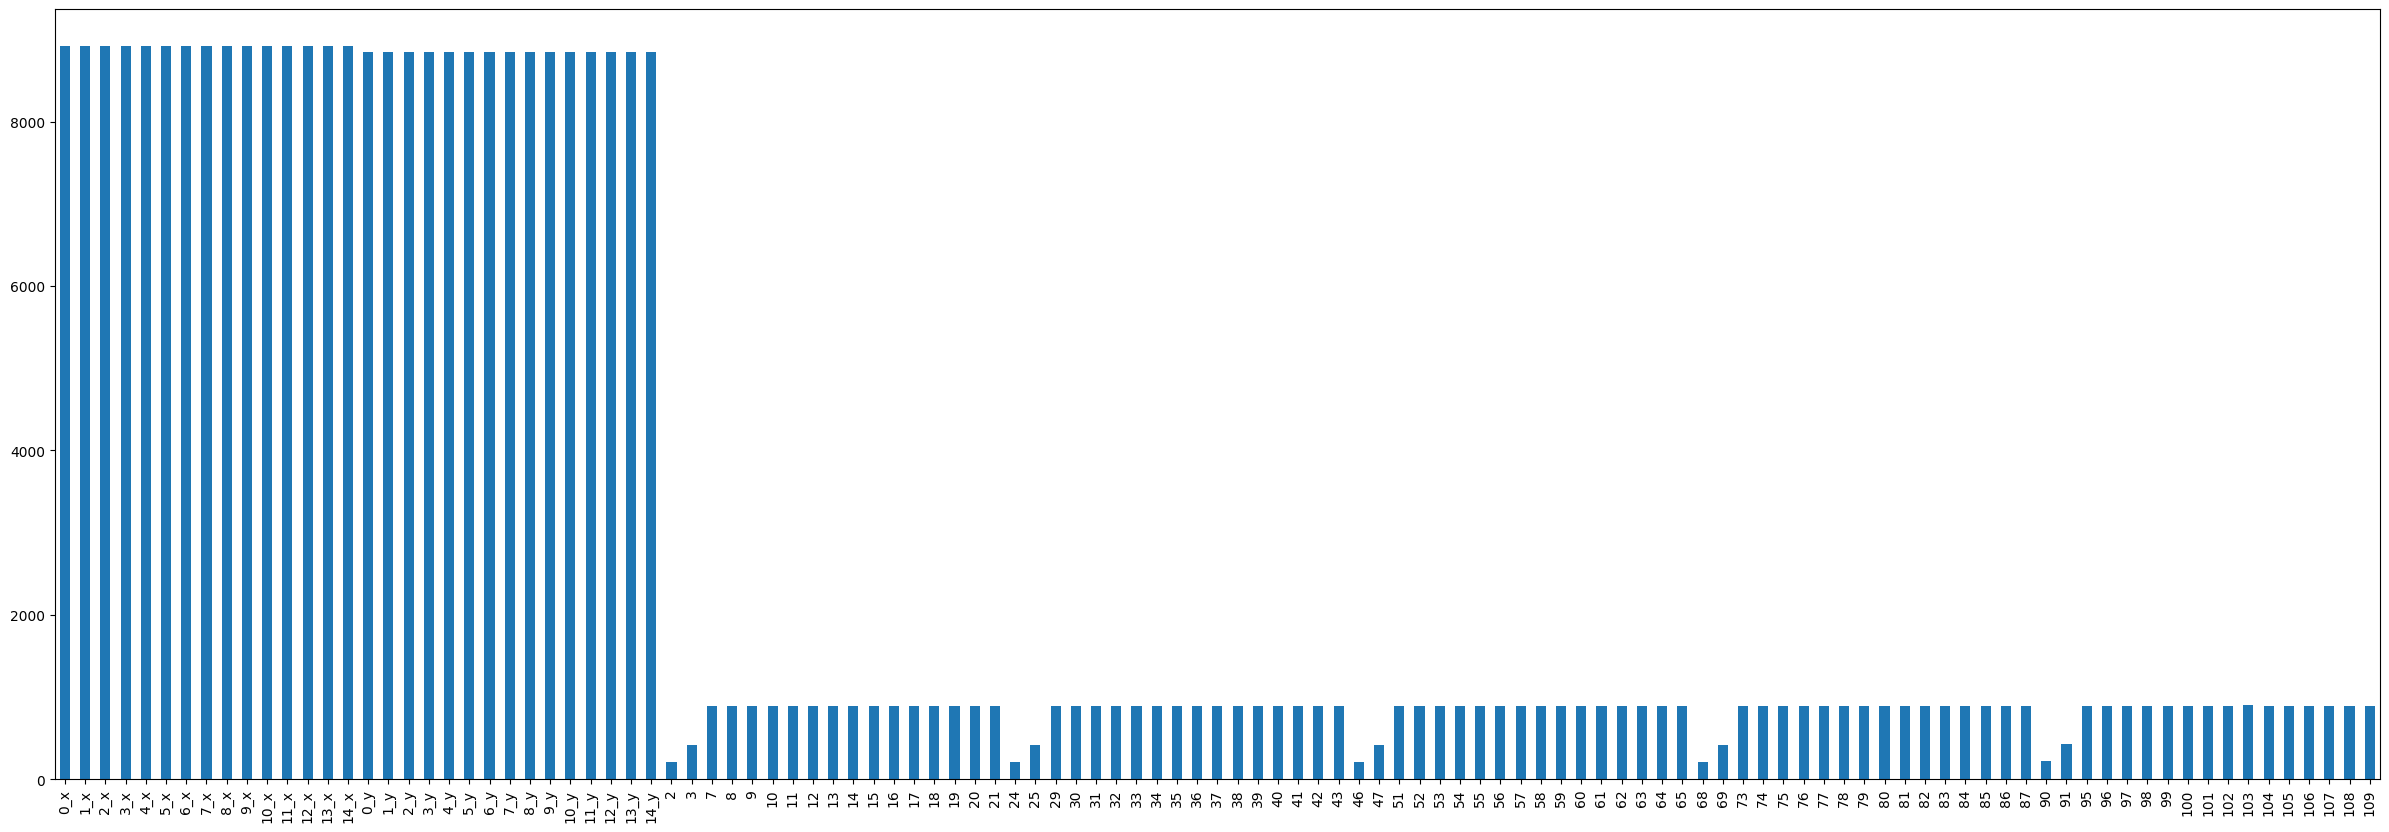

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10)) # You can adjust the size as you need
data.isna().sum()[data.isna().sum()>0].plot(kind="bar")
plt.show()


In [9]:
#data=data.fillna(0)

In [7]:
data.columns[data.isnull().any()].tolist()

['0_x',
 '1_x',
 '2_x',
 '3_x',
 '4_x',
 '5_x',
 '6_x',
 '7_x',
 '8_x',
 '9_x',
 '10_x',
 '11_x',
 '12_x',
 '13_x',
 '14_x',
 '0_y',
 '1_y',
 '2_y',
 '3_y',
 '4_y',
 '5_y',
 '6_y',
 '7_y',
 '8_y',
 '9_y',
 '10_y',
 '11_y',
 '12_y',
 '13_y',
 '14_y',
 '2',
 '3',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '24',
 '25',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '46',
 '47',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '68',
 '69',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '90',
 '91',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109']

In [8]:
# Take the first 10% of your data
num_samples = int(len(data) * 0.1)
data_sample = data.iloc[:num_samples]





In [9]:
data_sample

,Unnamed: 0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,101,102,103,104,105,106,107,108,109,label
0,tr03-0052_0,4.949566,1.716723,3.063322,-3.168562,0.653102,2.582151,-2.453936,-0.671440,-0.206653,...,0.031316,0.315907,10.087598,122.122415,12.106193,0.000914,0.009215,0.111562,0.029171,0.0
1,tr03-0052_1,3.294568,1.773122,3.437111,-2.466453,1.073087,3.222085,-1.817267,-0.428240,-0.309468,...,0.010967,0.326214,29.746350,562.133171,18.897551,0.000273,0.008114,0.153325,0.024872,0.0
2,tr03-0052_2,2.313243,1.505059,3.529720,-2.305134,1.314736,2.953718,-0.834637,-1.001961,0.009905,...,0.021404,0.547738,25.590473,169.153486,6.610018,0.001585,0.040556,0.268076,0.074043,0.0
3,tr03-0052_3,3.621584,1.716069,3.572339,-2.606968,1.666539,3.156717,-0.977676,-1.423478,0.269535,...,0.008571,0.357944,41.763714,728.440486,17.441947,0.000246,0.010292,0.179514,0.028753,0.0
4,tr03-0052_4,3.402294,1.539172,2.453311,-1.864934,1.132373,3.679740,-1.844185,-1.506309,0.398084,...,0.006091,0.230898,37.906434,1025.293066,27.047996,0.000244,0.009250,0.250185,0.040060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85856,tr03-0940_195,1.909079,-0.279752,-0.336722,-1.915868,-0.822309,2.043098,0.204451,-0.892423,-0.359795,...,0.576172,1.083279,1.880133,8.963811,4.767648,0.008548,0.016072,0.076625,0.014836,3.0
85857,tr03-0940_196,1.795981,-0.300150,-0.382959,-1.976278,-0.896160,2.086072,0.175777,-0.864757,-0.325857,...,0.268149,0.932359,3.477014,15.355437,4.416271,0.005057,0.017585,0.077660,0.018861,3.0
85858,tr03-0940_197,1.813115,-0.294095,-0.226277,-1.916697,-0.874642,2.169559,0.229437,-1.023945,-0.167676,...,0.596881,1.322602,2.215855,6.277714,2.833088,0.007177,0.015903,0.045053,0.012024,3.0
85859,tr03-0940_198,1.863226,0.488136,1.262737,0.123061,0.551335,2.786107,-0.371943,-0.869697,0.027487,...,0.538023,1.011194,1.879462,7.404809,3.939856,0.010592,0.019908,0.078433,0.019687,3.0


In [10]:
# Extract the features and target variable from the sample
X = data_sample.drop(["label", "Unnamed: 0"], axis=1)
y = data_sample["label"]

In [11]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)
"""X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)"""

'X.replace([np.inf, -np.inf], np.nan, inplace=True)\nX.fillna(X.mean(), inplace=True)'

In [15]:
import pandas as pd
from scipy.stats import pearsonr
# Extract the features and target variable from the sample
X = data_sample.drop(["label", "Unnamed: 0"], axis=1)
y = data_sample["label"]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)
correlations = X.apply(lambda x: abs(pearsonr(x, y)[0]))

# Select features with a correlation above a certain threshold
selected_features = correlations[correlations > 0.15].index.tolist()

print("Selected Features: ", selected_features, "\n Length: ",len(selected_features))


Selected Features:  ['0_y', '4', '7', '11', '13', '15', '16', '26', '29', '31', '33', '35', '37', '38', '48', '51', '52', '53', '55', '56', '59', '60', '70', '77', '81'] 
 Length:  25


In [12]:
X

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,100,101,102,103,104,105,106,107,108,109
0,4.949566,1.716723,3.063322,-3.168562,0.653102,2.582151,-2.453936,-0.671440,-0.206653,-1.548770,...,3.824425,0.031316,0.315907,10.087598,122.122415,12.106193,0.000914,0.009215,0.111562,0.029171
1,3.294568,1.773122,3.437111,-2.466453,1.073087,3.222085,-1.817267,-0.428240,-0.309468,-1.871767,...,6.164653,0.010967,0.326214,29.746350,562.133171,18.897551,0.000273,0.008114,0.153325,0.024872
2,2.313243,1.505059,3.529720,-2.305134,1.314736,2.953718,-0.834637,-1.001961,0.009905,-2.041425,...,3.620561,0.021404,0.547738,25.590473,169.153486,6.610018,0.001585,0.040556,0.268076,0.074043
3,3.621584,1.716069,3.572339,-2.606968,1.666539,3.156717,-0.977676,-1.423478,0.269535,-2.167322,...,6.243240,0.008571,0.357944,41.763714,728.440486,17.441947,0.000246,0.010292,0.179514,0.028753
4,3.402294,1.539172,2.453311,-1.864934,1.132373,3.679740,-1.844185,-1.506309,0.398084,-1.977086,...,6.245324,0.006091,0.230898,37.906434,1025.293066,27.047996,0.000244,0.009250,0.250185,0.040060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85856,1.909079,-0.279752,-0.336722,-1.915868,-0.822309,2.043098,0.204451,-0.892423,-0.359795,-0.448907,...,5.164694,0.576172,1.083279,1.880133,8.963811,4.767648,0.008548,0.016072,0.076625,0.014836
85857,1.795981,-0.300150,-0.382959,-1.976278,-0.896160,2.086072,0.175777,-0.864757,-0.325857,-0.411528,...,4.117548,0.268149,0.932359,3.477014,15.355437,4.416271,0.005057,0.017585,0.077660,0.018861
85858,1.813115,-0.294095,-0.226277,-1.916697,-0.874642,2.169559,0.229437,-1.023945,-0.167676,-0.400525,...,3.747049,0.596881,1.322602,2.215855,6.277714,2.833088,0.007177,0.015903,0.045053,0.012024
85859,1.863226,0.488136,1.262737,0.123061,0.551335,2.786107,-0.371943,-0.869697,0.027487,-1.539631,...,3.983958,0.538023,1.011194,1.879462,7.404809,3.939856,0.010592,0.019908,0.078433,0.019687


In [13]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
85856    3.0
85857    3.0
85858    3.0
85859    3.0
85860    3.0
Name: label, Length: 85861, dtype: float64

In [14]:
y.value_counts()

1.0    30907
0.0    18685
2.0    18084
3.0    12814
4.0     5371
Name: label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_selected = X[selected_features]


NameError: name 'selected_features' is not defined

In [65]:
X_selected

,0_y,4,7,11,13,15,16,26,29,31,...,51,52,53,55,56,59,60,70,77,81
0,4.694723,480.0,0.501196,0.066549,3.432515,1.175601,0.452049,618.0,0.273404,0.390320,...,0.151898,0.097694,0.586273,0.083369,6.001094,1.032244,0.853369,461.0,0.048863,1.139597
1,5.168976,528.0,0.465144,0.078574,3.314845,1.633638,0.531908,652.0,0.212596,0.417442,...,0.129145,0.141239,0.516875,0.101469,3.659578,0.911892,0.718418,404.0,0.043834,1.045755
2,5.013082,503.0,0.418230,0.075930,3.774375,1.446758,0.455303,597.0,0.252013,0.434202,...,0.614863,0.109557,0.233196,0.023157,2.128545,1.204445,0.211373,449.0,0.043190,1.080650
3,5.398469,505.0,0.462415,0.067224,4.126515,1.178983,0.494509,573.0,0.266927,0.407572,...,0.186964,0.099543,0.588401,0.062702,5.911014,1.004997,0.629892,453.0,0.041987,0.916294
4,4.325988,445.0,0.698816,0.046663,2.005511,0.935667,0.420147,575.0,0.438256,0.195569,...,0.315347,0.138028,0.265487,0.145560,1.923431,1.073633,1.054569,453.0,0.045890,1.090244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85856,5.707097,499.0,0.493559,0.066155,1.948159,0.721111,0.301166,503.0,0.493205,0.124358,...,0.370858,0.288106,0.158597,0.079116,0.550480,0.765714,0.274606,527.0,0.074846,0.686508
85857,5.566018,455.0,0.531309,0.057528,2.580078,0.408603,0.471767,491.0,0.429018,0.147846,...,0.448336,0.217644,0.096929,0.047104,0.445354,0.247934,0.216428,455.0,0.068160,0.567674
85858,5.961139,455.0,0.434001,0.047897,4.171161,0.286169,0.317322,481.0,0.388503,0.187514,...,0.330898,0.280029,0.168889,0.047287,0.603113,0.273498,0.168864,510.0,0.073928,0.599387
85859,5.783832,479.0,0.447868,0.063399,2.822279,0.570458,0.319128,489.0,0.475258,0.145118,...,0.353012,0.300006,0.140895,0.069301,0.469640,0.506640,0.231000,519.0,0.084458,0.620414


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:

model1 = make_pipeline(StandardScaler(),
                    RandomForestClassifier(verbose=1))
model1.fit(X_train,y_train)
preds1=model1.predict(X_test)

modelscore2(y_pred=preds1,y_true=y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


{'Accuracy': 66.9358282542024,
 'f1-score': 0.6044391697886585,
 'Recall': 0.5863905297737793,
 'Precision': 0.6931124560719149}

In [22]:

model1 = make_pipeline(StandardScaler(),
                   KNeighborsClassifier(n_neighbors=20))
model1.fit(X_train,y_train)
preds1=model1.predict(X_test)

modelscore2(y_pred=preds1,y_true=y_test)


{'Accuracy': 68.93512946931169,
 'f1-score': 0.6495246799763896,
 'Recall': 0.6311755442342315,
 'Precision': 0.6859184116741415}

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


clf = KNeighborsClassifier(n_neighbors=20,n_jobs=-1)

# Train the classifier
clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    print(feature)

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15 (this is a threshold you can adjust)
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X, y)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

('0_x', 0.007838100931991498)
('1_x', 0.007751613482739288)
('2_x', 0.008167986404930438)
('3_x', 0.007337230326006602)
('4_x', 0.007371318255208468)
('5_x', 0.007295427644121407)
('6_x', 0.008363891346275791)
('7_x', 0.007316953756112266)
('8_x', 0.007366587315338357)
('9_x', 0.007313959495953189)
('10_x', 0.00655759943684936)
('11_x', 0.006838183869903233)
('12_x', 0.007163865824266072)
('13_x', 0.006762563564005167)
('14_x', 0.006416707059273323)
('0_y', 0.007917712333741639)
('1_y', 0.008261235730266088)
('2_y', 0.009019671252281683)
('3_y', 0.00614507953688614)
('4_y', 0.007216614712946592)
('5_y', 0.00862136662241889)
('6_y', 0.01019232821016439)
('7_y', 0.007503473017014187)
('8_y', 0.00826428329353583)
('9_y', 0.007082095723446602)
('10_y', 0.007636404091387178)
('11_y', 0.008143146853179444)
('12_y', 0.008113169643797833)
('13_y', 0.007886467076135627)
('14_y', 0.0069267460126145805)
('0', 0.006587884636571625)
('1', 0.009453566900425607)
('2', 0.006317495064115845)
('3', 0.00

In [67]:
len(X_train),len( X_test), len(y_train),len( y_test) 

(60102, 25759, 60102, 25759)

In [69]:
model1 = make_pipeline(StandardScaler(),
                    GradientBoostingClassifier(verbose=1))

In [70]:
import numpy as np

print("Contains NaN: ", np.isnan(X_train).any())
print("Contains Inf: ", np.isinf(X_train).any())


Contains NaN:  0_y    False
4      False
7      False
11     False
13     False
15     False
16     False
26     False
29     False
31     False
33     False
35     False
37     False
38     False
48     False
51     False
52     False
53     False
55     False
56     False
59     False
60     False
70     False
77     False
81     False
dtype: bool
Contains Inf:  0_y    False
4      False
7      False
11     False
13     False
15     False
16     False
26     False
29     False
31     False
33     False
35     False
37     False
38     False
48     False
51     False
52     False
53     False
55     False
56     False
59     False
60     False
70     False
77     False
81     False
dtype: bool


In [71]:
model1.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4475            6.51m
         2           1.4194            6.18m
         3           1.3962            6.45m
         4           1.3773            6.39m
         5           1.3604            6.41m
         6           1.3463            6.26m
         7           1.3341            6.32m
         8           1.3230            6.22m
         9           1.3134            6.07m
        10           1.3048            5.92m
        20           1.2515            4.90m
        30           1.2243            4.39m
        40           1.2059            3.70m
        50           1.1929            3.07m
        60           1.1818            2.44m
        70           1.1717            1.81m
        80           1.1625            1.20m
        90           1.1541           35.91s
       100           1.1456            0.00s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(verbose=1))])

In [72]:
preds1=model1.predict(X_test)

In [73]:
preds1

array([1., 1., 1., ..., 3., 3., 3.])

In [75]:
from plotingfun import *
from helper_functions import *
modelscore2(y_pred=preds1,y_true=y_test)

{'Accuracy': 43.7711091269071,
 'f1-score': 0.3216788778104066,
 'Recall': 0.3373223387338866,
 'Precision': 0.36242226917111303}

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=preds1)

array([[ 722, 2915,  444,  970,   14],
       [1051, 6480,  447, 1051,   18],
       [ 612, 2491, 2295,  709,   11],
       [ 153, 1375,  653, 1767,   17],
       [ 115,  698,  175,  565,   11]], dtype=int64)

In [77]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision

In [78]:

mixed_precision.set_global_policy('mixed_float16')

In [81]:
    #model
    input_layer = tf.keras.Input(shape=(25,1),name="input_layer")
    Conv2D_layer_1 = tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="relu",name="Conv2D_layer1")(input_layer)
    Conv2D_layer_2 = tf.keras.layers.Conv1D(10, 3, activation="relu",name="Conv2D_layer_2")(Conv2D_layer_1)
    MaxPooling2D_layer_1 = tf.keras.layers.MaxPooling1D(pool_size=2, padding="valid",name="MaxPooling2D_layer_1")(Conv2D_layer_2)
    Conv2D_layer_3= tf.keras.layers.Conv1D(10, 3, activation="relu",name="Conv2D_layer_3")(MaxPooling2D_layer_1)
    Conv2D_layer_4 = tf.keras.layers.Conv1D(10, 3, activation="relu",name="Conv2D_layer_4")(Conv2D_layer_3)
    MaxPooling2D_layer_2 = tf.keras.layers.MaxPooling1D(2,name="MaxPooling2D_layer_2")(Conv2D_layer_4)
    Flattening_layer = tf.keras.layers.Flatten(name="Flattening_layer")(MaxPooling2D_layer_2)
    Dense_layer_1 = tf.keras.layers.Dense(32, activation="relu",name="Dense_layer_1")(Flattening_layer)
    Dense_layer_2 = tf.keras.layers.Dense(64, activation="relu",name="Dense_layer_2")(Dense_layer_1)
    Dense_layer_3 = tf.keras.layers.Dense(128, activation="relu",name="Dense_layer_3")(Dense_layer_2)
    output_layer = tf.keras.layers.Dense(5, activation="softmax")(Dense_layer_3)
    cnn_model = tf.keras.Model(inputs=input_layer, outputs=output_layer,name="cnn_model")
    # 2 compile the model
    cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

    #3 fitting
    history1=cnn_model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test),callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True)])

Epoch 1/10
1879/1879 [==============================] - 29s 14ms/step - loss: 1.4080 - accuracy: 0.3997 - val_loss: 1.3612 - val_accuracy: 0.4267
Epoch 2/10
1879/1879 [==============================] - 25s 13ms/step - loss: 1.3335 - accuracy: 0.4402 - val_loss: 1.3527 - val_accuracy: 0.4308
Epoch 3/10
1879/1879 [==============================] - 25s 13ms/step - loss: 1.3176 - accuracy: 0.4445 - val_loss: 1.3465 - val_accuracy: 0.4287
Epoch 4/10
1879/1879 [==============================] - 25s 14ms/step - loss: 1.3037 - accuracy: 0.4491 - val_loss: 1.3245 - val_accuracy: 0.4310
Epoch 5/10
1879/1879 [==============================] - 27s 14ms/step - loss: 1.2908 - accuracy: 0.4535 - val_loss: 1.3423 - val_accuracy: 0.4224
Epoch 6/10
1879/1879 [==============================] - 29s 15ms/step - loss: 1.2789 - accuracy: 0.4584 - val_loss: 1.3430 - val_accuracy: 0.4302
Epoch 7/10
1879/1879 [==============================] - 25s 13ms/step - loss: 1.2726 - accuracy: 0.4594 - val_loss: 1.3639 -

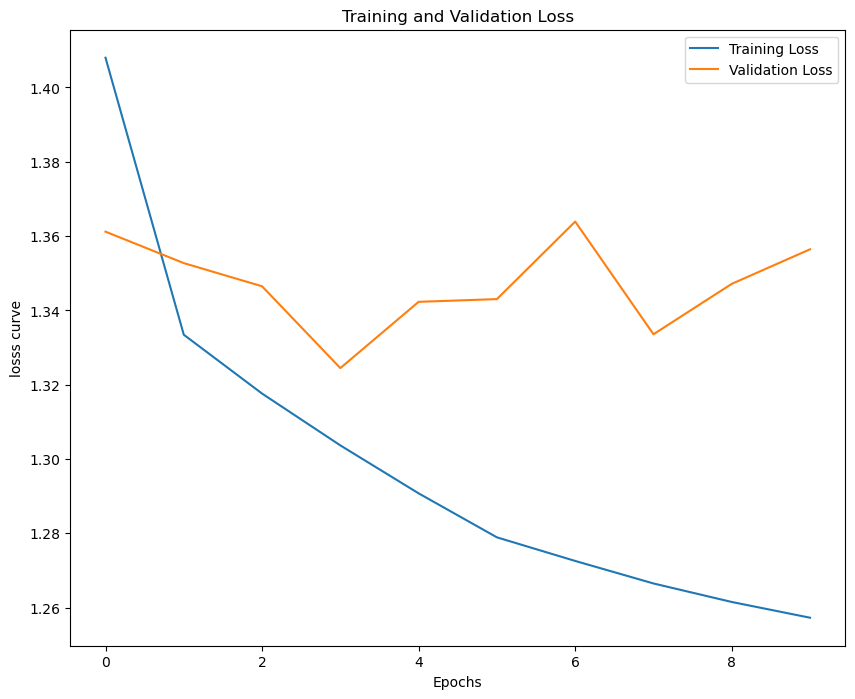

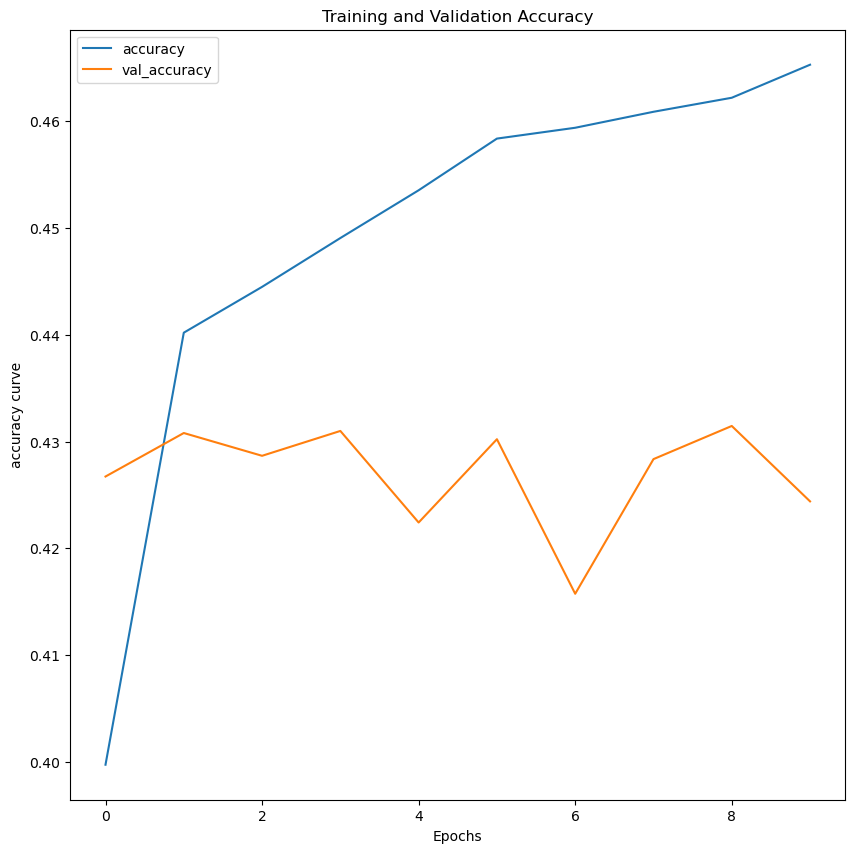

In [82]:
loss(history1)

In [83]:
    #1 model archi
    input_layer=tf.keras.layers.Input(shape=(25,1),name="Input_Layer")
    lstm_layer1=tf.keras.layers.LSTM(100,return_sequences=True,activation="tanh")(input_layer)
    lstm_layer2=tf.keras.layers.LSTM(100,activation="tanh")(lstm_layer1)
    output_layer=tf.keras.layers.Dense(5,activation="softmax")(lstm_layer2)
    lstm_model=tf.keras.Model(inputs=input_layer,outputs=output_layer,name="lstm_model")
    # 2 compile the model
    lstm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
    history2=lstm_model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test),callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True)])

Epoch 1/10
1879/1879 [==============================] - 31s 15ms/step - loss: 1.3383 - accuracy: 0.4279 - val_loss: 1.3701 - val_accuracy: 0.4152
Epoch 2/10
1879/1879 [==============================] - 29s 16ms/step - loss: 1.2931 - accuracy: 0.4486 - val_loss: 1.3233 - val_accuracy: 0.4301
Epoch 3/10
1879/1879 [==============================] - 30s 16ms/step - loss: 1.2677 - accuracy: 0.4569 - val_loss: 1.3176 - val_accuracy: 0.4111
Epoch 4/10
1879/1879 [==============================] - 30s 16ms/step - loss: 1.2448 - accuracy: 0.4703 - val_loss: 1.3162 - val_accuracy: 0.4261
Epoch 5/10
1879/1879 [==============================] - 26s 14ms/step - loss: 1.2236 - accuracy: 0.4774 - val_loss: 1.3089 - val_accuracy: 0.4328
Epoch 6/10
1879/1879 [==============================] - 26s 14ms/step - loss: 1.1999 - accuracy: 0.4912 - val_loss: 1.3751 - val_accuracy: 0.4137
Epoch 7/10
1879/1879 [==============================] - 29s 16ms/step - loss: 1.1797 - accuracy: 0.4985 - val_loss: 1.3597 -

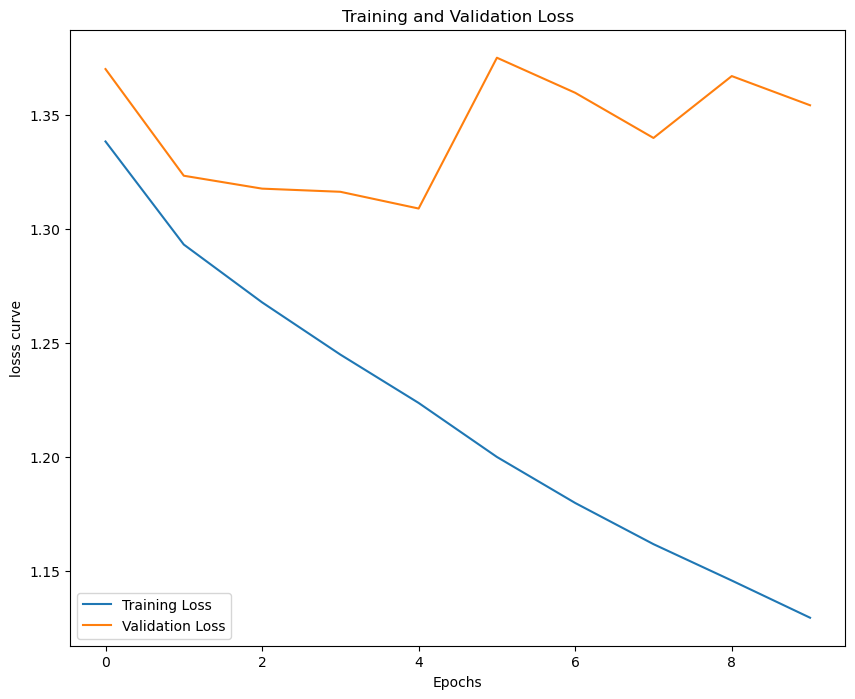

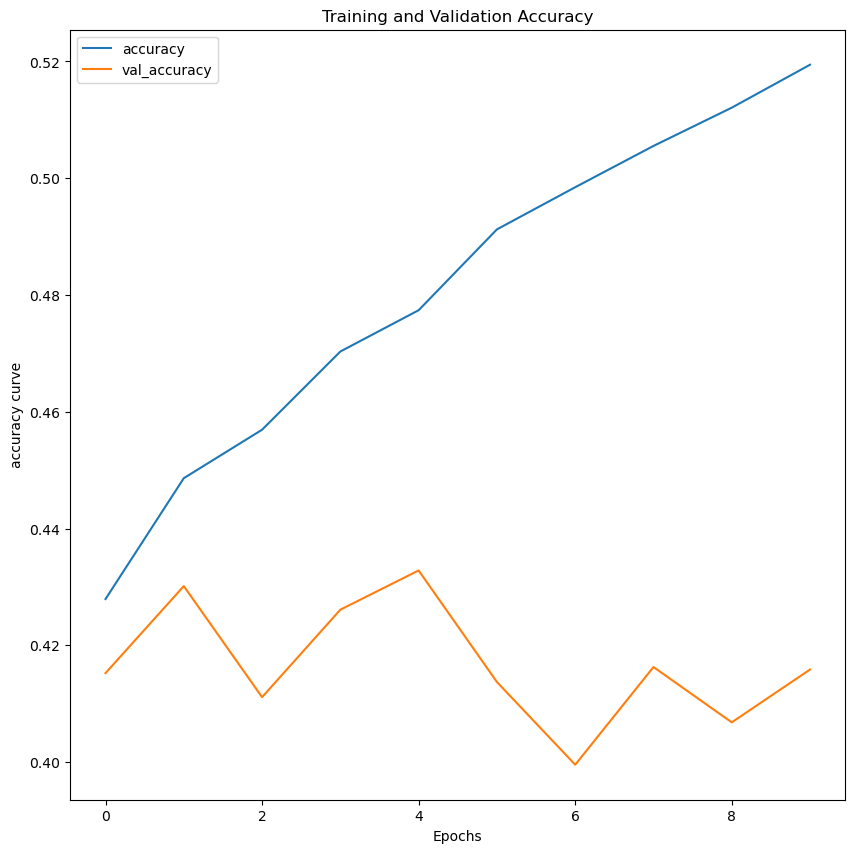

In [84]:
loss(history2)

In [88]:
# Model Architecture
input_layer = tf.keras.layers.Input(shape=(25,1), name="Input_Layer")

# LSTM Layer 1 with Dropout
lstm_layer1 = tf.keras.layers.LSTM(100, return_sequences=True, activation="tanh")(input_layer)
dropout1 = tf.keras.layers.Dropout(0.2)(lstm_layer1)  # 20% dropout

# LSTM Layer 2 with Dropout
lstm_layer2 = tf.keras.layers.LSTM(100, activation="tanh")(dropout1)
dropout2 = tf.keras.layers.Dropout(0.2)(lstm_layer2)  # 20% dropout

# Normalization Layer
norm_layer = tf.keras.layers.BatchNormalization()(dropout2)

# Output Layer
output_layer = tf.keras.layers.Dense(5, activation="softmax")(norm_layer)

# Create the model
lstm_model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="lstm_model")

# Compile the Model
lstm_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the Model
history2 = lstm_model.fit(
    X_train, y_train, 
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=100, restore_best_weights=True)
    ]
)

Epoch 1/100
1879/1879 [==============================] - 38s 18ms/step - loss: 1.4055 - accuracy: 0.3992 - val_loss: 1.3577 - val_accuracy: 0.4431
Epoch 2/100
1879/1879 [==============================] - 33s 18ms/step - loss: 1.3276 - accuracy: 0.4364 - val_loss: 1.3354 - val_accuracy: 0.4229
Epoch 3/100
1879/1879 [==============================] - 33s 18ms/step - loss: 1.3093 - accuracy: 0.4439 - val_loss: 1.3332 - val_accuracy: 0.4358
Epoch 4/100
1879/1879 [==============================] - 36s 19ms/step - loss: 1.2950 - accuracy: 0.4505 - val_loss: 1.3438 - val_accuracy: 0.4150
Epoch 5/100
1879/1879 [==============================] - 36s 19ms/step - loss: 1.2849 - accuracy: 0.4539 - val_loss: 1.3197 - val_accuracy: 0.4229
Epoch 6/100
1879/1879 [==============================] - 35s 19ms/step - loss: 1.2709 - accuracy: 0.4591 - val_loss: 1.3283 - val_accuracy: 0.4201
Epoch 7/100
1879/1879 [==============================] - 34s 18ms/step - loss: 1.2589 - accuracy: 0.4650 - val_loss: 1

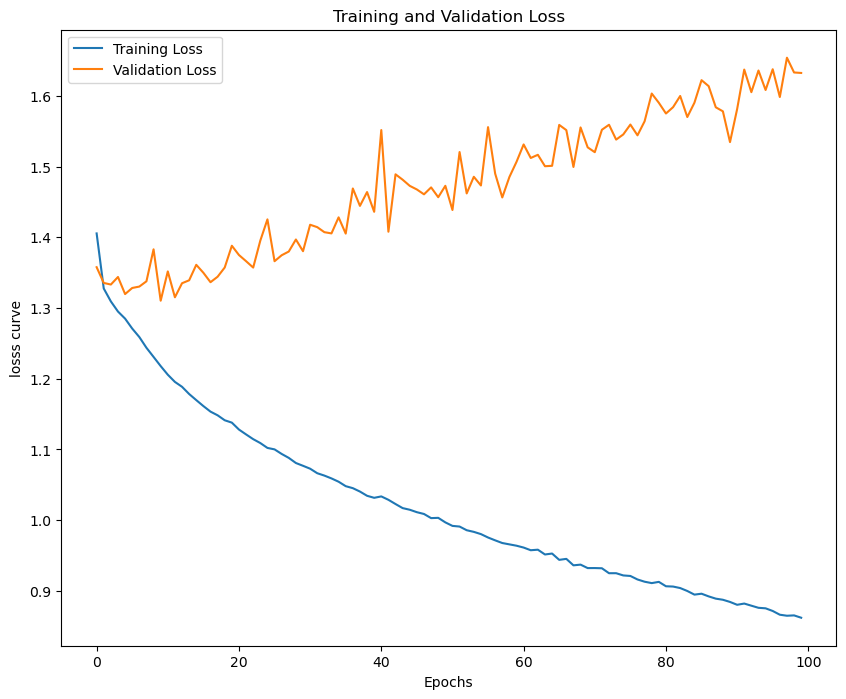

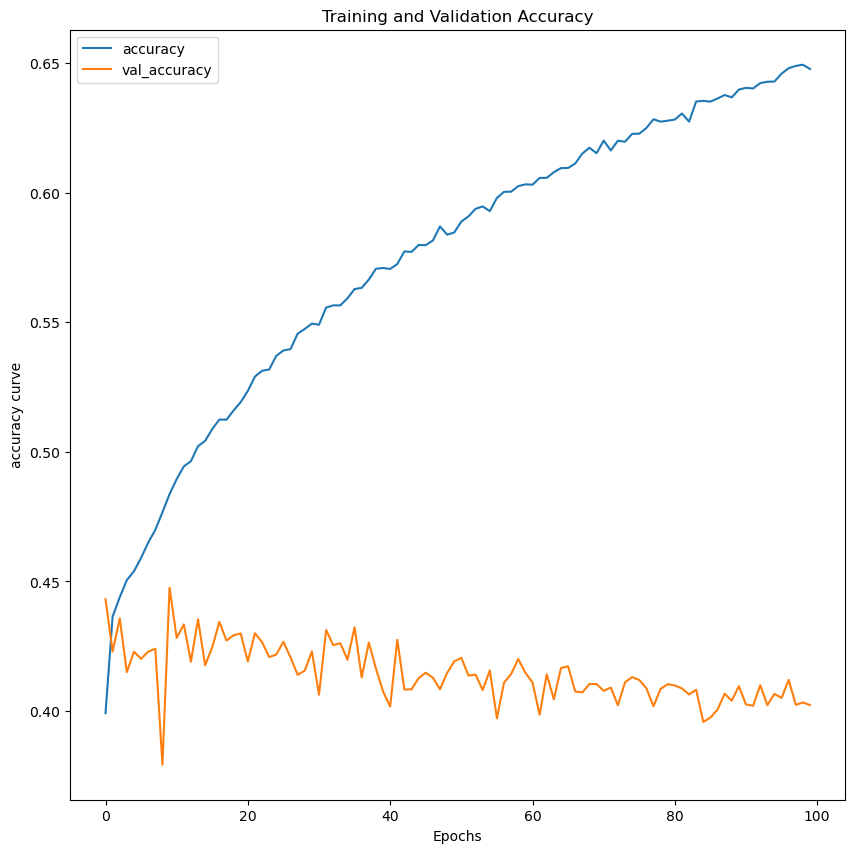

In [89]:
loss(history2)

In [ ]:


def create_model(trial):
    # Model Architecture
    input_layer = tf.keras.layers.Input(shape=(25,1), name="Input_Layer")

    # LSTM Layer 1 with Dropout
    n_units = trial.suggest_int("n_units", 50, 200)
    lstm_layer1 = tf.keras.layers.LSTM(n_units, return_sequences=True, activation="tanh")(input_layer)
    dropout1 = tf.keras.layers.Dropout(0.2)(lstm_layer1)  # 20% dropout

    # LSTM Layer 2 with Dropout
    lstm_layer2 = tf.keras.layers.LSTM(n_units, activation="tanh")(dropout1)
    dropout2 = tf.keras.layers.Dropout(0.2)(lstm_layer2)  # 20% dropout

    # Normalization Layer
    norm_layer = tf.keras.layers.BatchNormalization()(dropout2)

    # Output Layer
    output_layer = tf.keras.layers.Dense(5, activation="softmax")(norm_layer)

    # Create the model
    lstm_model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="lstm_model")

    # Compile the Model
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    lstm_model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        metrics=['accuracy']
    )
    return lstm_model


def objective(trial):
    # Clear clutter from previous Keras session graphs.
    tf.keras.backend.clear_session()

    model = create_model(trial)

    model.fit(
        X_train, 
        y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        callbacks=[TFKerasPruningCallback(trial, "val_accuracy")]
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]  # Return validation accuracy


study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
